In [1]:
using CairoMakie, LaTeXStrings, LinearAlgebra

In [2]:
p1, p2 = [0, 2], [0, -2]
p3, p4 = [1, 0], [-1, 0]
ϕ(x, y) = begin
    r = [x, y]
    s= 2/norm(r.-p1)  + 2/norm(r.-p2) - 1/norm(r.-p3) - 1/norm(r.-p4)
end

ϕ (generic function with 1 method)

In [3]:
xx = -5:0.01:5
yy = -5:0.01:5
pp = [ϕ(x, y) for x ∈ xx, y ∈ yy];
clamp!(pp, -1000, 1000)

1001×1001 Matrix{Float64}:
 0.291282  0.291509  0.291736  0.291962  …  0.291736  0.291509  0.291282
 0.291665  0.291893  0.292121  0.292349     0.292121  0.291893  0.291665
 0.29205   0.292279  0.292508  0.292736     0.292508  0.292279  0.29205
 0.292436  0.292666  0.292895  0.293124     0.292895  0.292666  0.292436
 0.292823  0.293053  0.293284  0.293514     0.293284  0.293053  0.292823
 0.29321   0.293442  0.293673  0.293905  …  0.293673  0.293442  0.29321
 0.293599  0.293832  0.294064  0.294296     0.294064  0.293832  0.293599
 0.293989  0.294222  0.294456  0.294689     0.294456  0.294222  0.293989
 0.294379  0.294614  0.294848  0.295082     0.294848  0.294614  0.294379
 0.294771  0.295007  0.295242  0.295477     0.295242  0.295007  0.294771
 ⋮                                       ⋱                      ⋮
 0.294379  0.294614  0.294848  0.295082     0.294848  0.294614  0.294379
 0.293989  0.294222  0.294456  0.294689     0.294456  0.294222  0.293989
 0.293599  0.293832  0.294064  0.

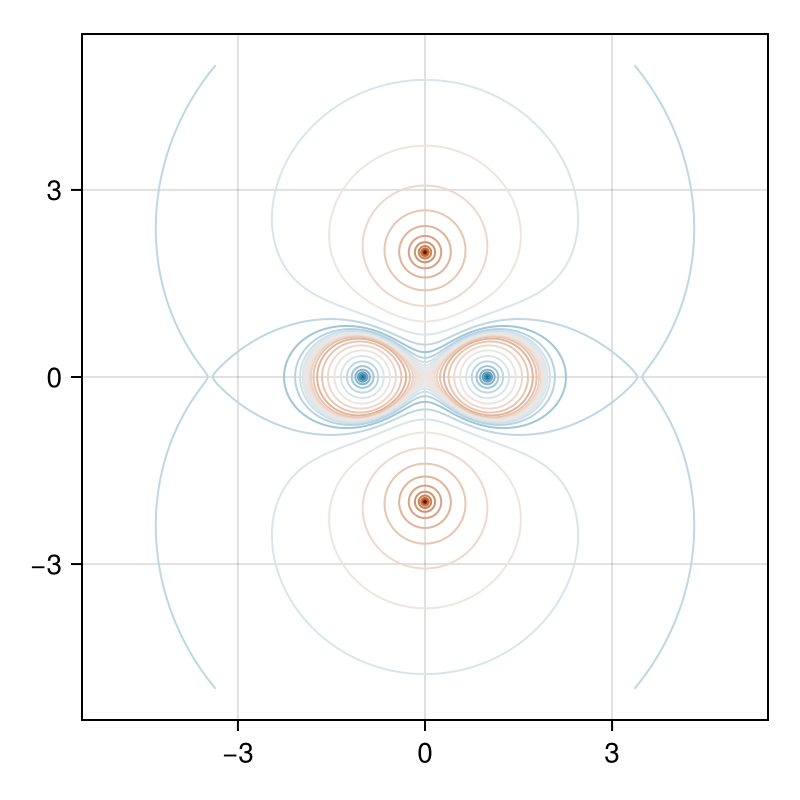

In [4]:
t=-3.2:0.2:3
a = 12.0.^t
b = (-a)[end:-1:1]

levels = hcat(b', a')[1,:]
colorscale = ReversibleScale(x -> x^(1 / 10), x -> x^10)
#colorscale = ReversibleScale(x -> x, x -> x^10)
f=Figure(size=(400, 400))
ax = Axis(f[1, 1], aspect=1) 
contour!(ax, xx, yy, pp;levels=levels, colormap=:vik, colorscale=Makie.Symlog10(.2))

f

In [5]:
t=-5:1:5 
a = 10.0.^t
b = (-a)[end:-1:1]
hcat(b', a')[1,:]

22-element Vector{Float64}:
 -100000.0
  -10000.0
   -1000.0
    -100.0
     -10.0
      -1.0
      -0.1
      -0.010000000000000002
      -0.001
      -0.0001
       ⋮
       0.001
       0.010000000000000002
       0.1
       1.0
      10.0
     100.0
    1000.0
   10000.0
  100000.0

In [6]:
c=[]
for i in (-1, 1) 
    for j in (-1, 1)
        for k in (1, -1)
            push!(c, [i, j, k])
        end
    end
end

In [8]:
function phi(x::Vector) 
    r = 0
    for cv in c
        r += 1/norm(x .- cv)
    end
    return r
end

phi (generic function with 1 method)

In [9]:
phi([0, 0, 0])

4.618802153517007

In [10]:
phi([1, 0, 0])

4.461420286601642

In [12]:
phi2(t) = phi([t, 0, 0])

phi2 (generic function with 1 method)

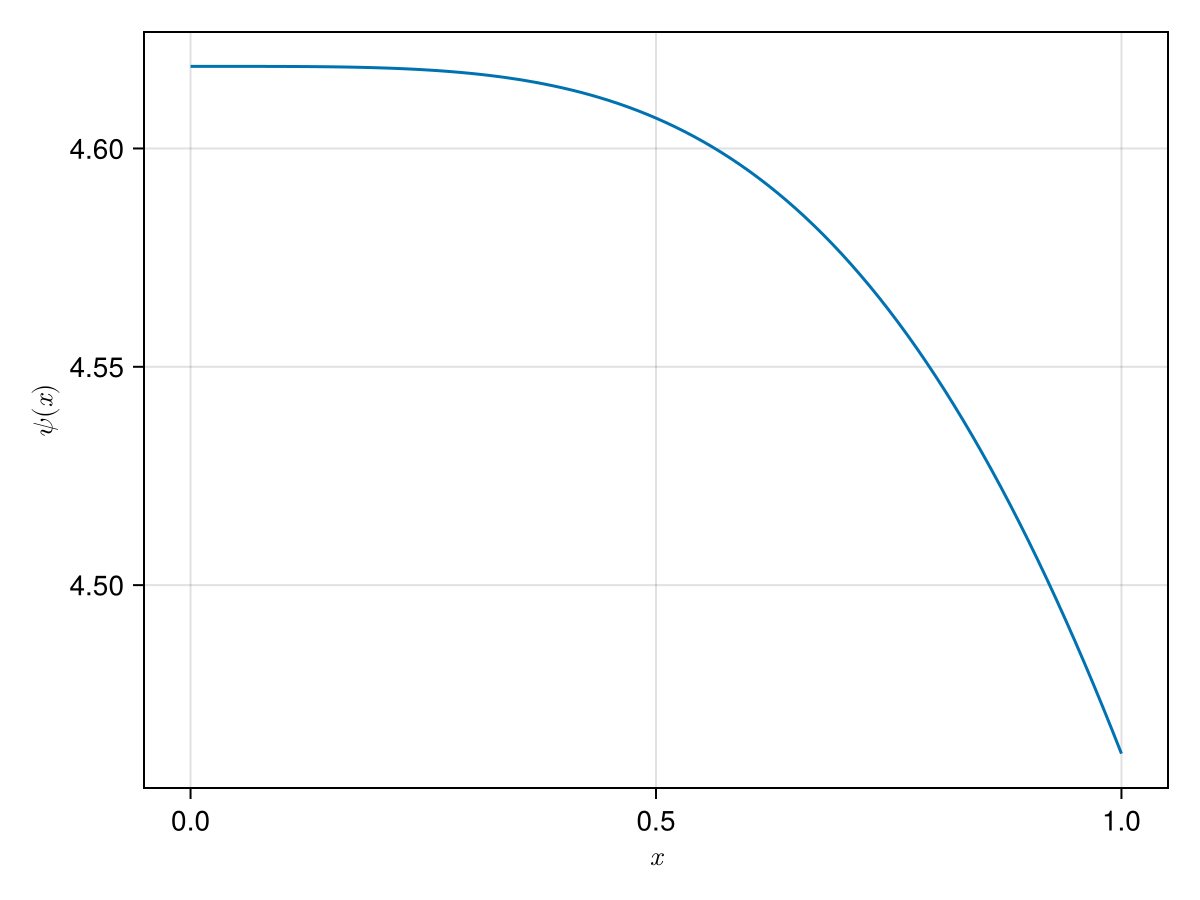

In [18]:
t = 0:0.01:1.0
fig=Figure()
ax = Axis(fig[1, 1], xlabel = L"x", ylabel = L"\psi(x)")
lines!(ax, t, phi2.(t))
fig
#save("escape_from_cube.png", fig)